***Importing Libraries & Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2
from scipy.stats import chi2_contingency

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Import dataset and explore 

In [2]:
# Load Excel file into a dataframe
data=pd.read_excel('credit-data-training.xlsx')

In [3]:
# Shape of the data frame
data.shape

(500, 20)

In [4]:
# View the first five rows of the dataframe
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [5]:
# Overview of the data
data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [6]:
# View useful information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

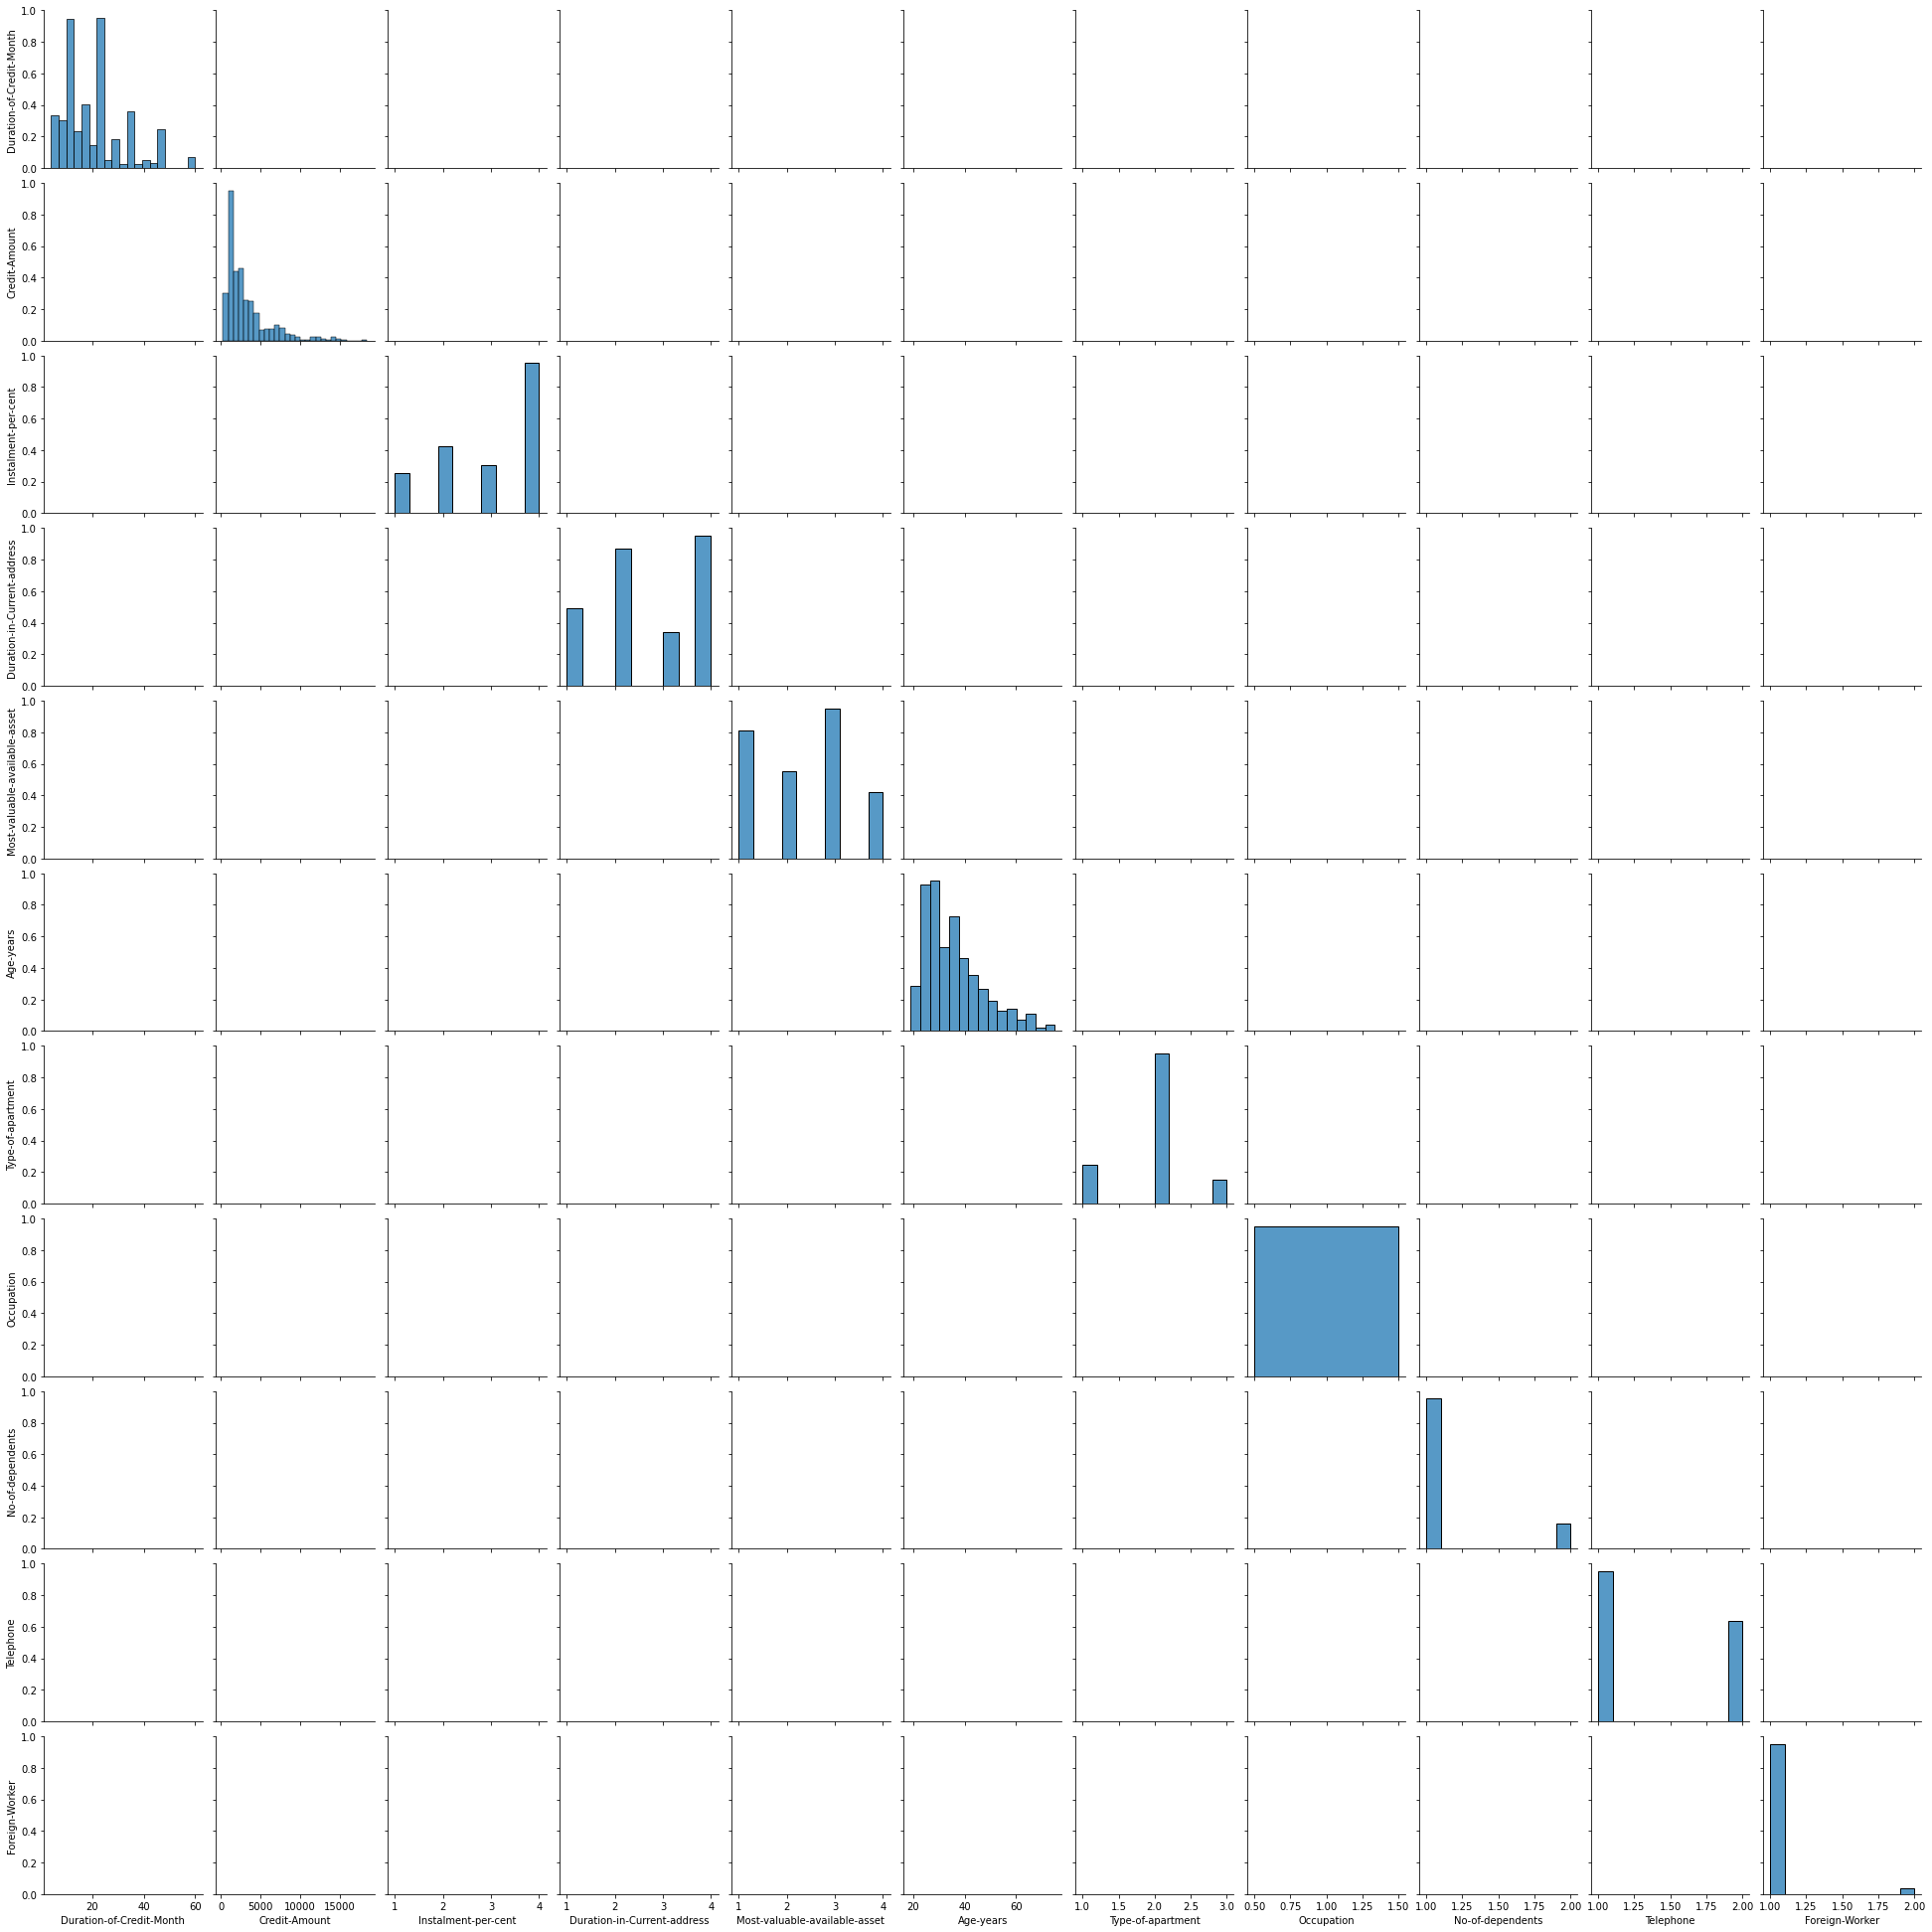

In [7]:
# Plot pairwise relationships of columns in data. Off-diagonals plots have been put off.
sns.pairplot(data, kind=None)

C:\Users\kojoa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age-years', ylabel='Density'>

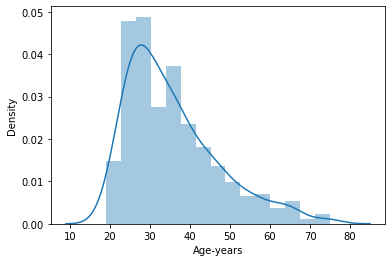

In [8]:
# Shows distribution of ages
data.value_counts('Age-years',sort=False)
sns.distplot(data['Age-years'])

In [9]:
# Finding missing values in data columns
data.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [10]:
# Calculating percentage of missing values
[(344/500)*100,(12/500)*100]

[68.8, 2.4]

# Feature selection and extraction

**'Credit-Application-Result' is selected as target variable as we want to predict credit-worthiness of applicants.**<br>
1. 'Duration-in-Current-address' has many missing values, so it will be dropped.<br>
2. Replace missing values in age with median age value.


<AxesSubplot:>

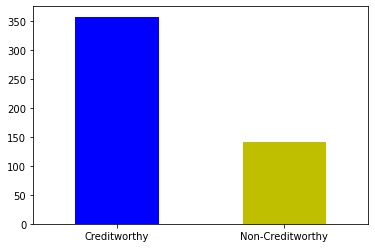

In [11]:
#Comparing results of responses in the target variable
data['Credit-Application-Result'].value_counts().plot(kind='bar', rot=360, color=['b','y'])

In [12]:
# Drop column 'Durarion-in-Current-address' and keep changes.
data.drop(columns='Duration-in-Current-address',axis=1,inplace=True)


***Replacing missing age values with median, rounded off to no decimal place***

In [13]:
# Inspect 'Age-years' column
data['Age-years']
data['Age-years'].median()

33.0

Median age is 33

In [14]:
# Replace missing values in 'Age-years' with median age
data['Age-years'].fillna(np.round(data['Age-years'].median(),0),inplace=True)
data

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,1,33.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,None,1,33.0,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,None,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,None,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,None,4,63.0,Other Banks/Depts,3,1,1,1,2,1


In [15]:
# Re-check for missing values in entire dataset
data.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

Missing 'Age-years' values have been replaced, so it has no missing 
values now.

**Target variable of training data exhibits bias. This may affect future predictions.**

# Grouping features into numerical and categorical groups

***Creating numerical and categorical dataframes***

In [16]:
numerical= data.select_dtypes(include=['int64','float64'])
categorical= data.select_dtypes(include='object')

***Dealing with numerical variables***

In [17]:
# Inspect numerical dataframe
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Duration-of-Credit-Month       500 non-null    int64  
 1   Credit-Amount                  500 non-null    int64  
 2   Instalment-per-cent            500 non-null    int64  
 3   Most-valuable-available-asset  500 non-null    int64  
 4   Age-years                      500 non-null    float64
 5   Type-of-apartment              500 non-null    int64  
 6   Occupation                     500 non-null    int64  
 7   No-of-dependents               500 non-null    int64  
 8   Telephone                      500 non-null    int64  
 9   Foreign-Worker                 500 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 39.2 KB


In [18]:
# Check shape of numerical dataframe
numerical.shape

(500, 10)

***Correlation Matrix for Numerical variables***

In [19]:
# Create correlation matrix of numerical dataframe
numerical.corr()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
Duration-of-Credit-Month,1.000000,0.573980,0.068106,0.299855,-0.064197,0.152516,NaN,-0.065269,0.143176,-0.115916
Credit-Amount,0.573980,1.000000,-0.288852,0.325545,0.069316,0.170071,NaN,0.003986,0.286338,0.025493
Instalment-per-cent,0.068106,-0.288852,1.000000,0.081493,0.039270,0.074533,NaN,-0.125894,0.029354,-0.133411
Most-valuable-available-asset,0.299855,0.325545,0.081493,1.000000,0.086233,0.373101,NaN,0.046454,0.203509,-0.146005
Age-years,-0.064197,0.069316,0.039270,0.086233,1.000000,0.329350,NaN,0.117736,0.175115,-0.004518
Type-of-apartment,0.152516,0.170071,0.074533,0.373101,0.329350,1.000000,NaN,0.170738,0.101443,-0.089848
Occupation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No-of-dependents,-0.065269,0.003986,-0.125894,0.046454,0.117736,0.170738,NaN,1.000000,-0.048559,0.065943
Telephone,0.143176,0.286338,0.029354,0.203509,0.175115,0.101443,NaN,-0.048559,1.000000,-0.055516
Foreign-Worker,-0.115916,0.025493,-0.133411,-0.146005,-0.004518,-0.089848,NaN,0.065943,-0.055516,1.000000


<AxesSubplot:>

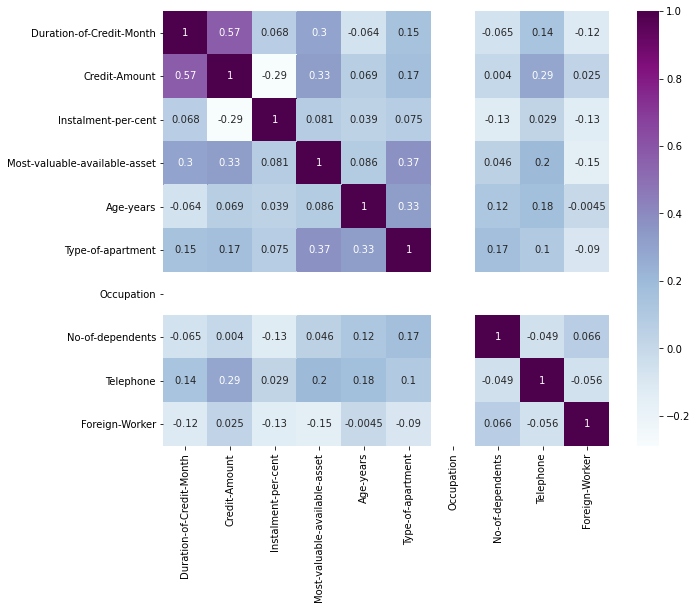

In [20]:
# Plot heatmap of numerical correlation matrix
plt.figure(figsize= (10,8))
sns.heatmap(data=numerical.corr(), cmap="BuPu", annot=True)

Telephone feature will be dropped because has very low correlation with other numerical variables.<br>
Foreign worker has very low correlation with other numerical variables,hence, will be dropped.<br>
No-of-dependents has very low correlation with other numerical variables,hence, will be dropped.<br>
Installment-per-cent has very low correlation with other numerical variables,hence, will be dropped.<br>
Occupation has no correlation with all the other numerical variables,hence, will be dropped.

In [21]:
# Remove above stated columns and keep changes
numerical.drop(columns=['Telephone','Foreign-Worker','Occupation','Instalment-per-cent','No-of-dependents'], axis=1, inplace=True)
numerical

C:\Users\kojoa\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,4,1494,1,33.0,2
1,4,1494,1,29.0,2
2,4,1544,1,42.0,2
3,4,3380,1,37.0,2
4,6,343,1,27.0,2
...,...,...,...,...,...
495,60,7418,1,33.0,2
496,60,7418,1,27.0,2
497,60,9157,4,27.0,3
498,60,13756,4,63.0,3


***Dealing with categorical variables***

In [22]:
# Inspect categorical dataframe
categorical

,Credit-Application-Result,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,Paid Up,Other,£100-£1000,< 1yr,None,Other Banks/Depts,1
1,Creditworthy,Some Balance,Paid Up,Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
2,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,More than 1
3,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,1
4,Creditworthy,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,No Problems (in this bank),Other,£100-£1000,< 1yr,None,Other Banks/Depts,1
496,Creditworthy,No Account,No Problems (in this bank),Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
497,Creditworthy,No Account,No Problems (in this bank),Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
498,Creditworthy,Some Balance,No Problems (in this bank),Home Related,£100-£1000,4-7 yrs,None,Other Banks/Depts,1


In [23]:
# Show different categories present in specific columns

display(categorical['Value-Savings-Stocks'].value_counts())
display(categorical['Guarantors'].value_counts())
display(categorical['Account-Balance'].value_counts())
display(categorical['No-of-Credits-at-this-Bank'].value_counts())
display(categorical['Purpose'].value_counts())
display(categorical['Concurrent-Credits'].value_counts())
display(categorical['No-of-Credits-at-this-Bank'].value_counts())
display(categorical['Payment-Status-of-Previous-Credit'].value_counts())

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64

None    457
Yes      43
Name: Guarantors, dtype: int64

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64

Other Banks/Depts    500
Name: Concurrent-Credits, dtype: int64

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64

About 91 percent of individuals have no guarantors hence did not influence earlier credit-worthiness decisions.<br>
Concurrent-credits has no variability.

In [24]:
# Drop selected columns from categorical dataframe
categorical.drop(['Guarantors','Concurrent-Credits'], axis=1, inplace= True)
categorical

C:\Users\kojoa\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Credit-Application-Result,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,No-of-Credits-at-this-Bank
0,Creditworthy,Some Balance,Paid Up,Other,£100-£1000,< 1yr,1
1,Creditworthy,Some Balance,Paid Up,Home Related,£100-£1000,< 1yr,1
2,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,More than 1
3,Creditworthy,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,1
4,Creditworthy,No Account,Paid Up,Home Related,None,< 1yr,1
...,...,...,...,...,...,...,...
495,Creditworthy,No Account,No Problems (in this bank),Other,£100-£1000,< 1yr,1
496,Creditworthy,No Account,No Problems (in this bank),Home Related,£100-£1000,< 1yr,1
497,Creditworthy,No Account,No Problems (in this bank),Home Related,£100-£1000,< 1yr,1
498,Creditworthy,Some Balance,No Problems (in this bank),Home Related,£100-£1000,4-7 yrs,1


In [25]:
# contingency_1=pd.crosstab(data['Account-Balance'], data['Purpose'])
# contingency_2=pd.crosstab(data['Concurrent-Credits'], data['Payment-Status-of-Previous-Credit'])
# contingency_3=pd.crosstab(data['Value-Savings-Stocks'], data['Length-of-current-employment'])
# contingency_4=pd.crosstab(data['Credit-Application-Result'], data['No-of-Credits-at-this-Bank'])

# display(contingency_1)
# display(contingency_2)
# display(contingency_3)
# display(contingency_4)

***Encoding Target variable***

In [26]:
# Encode target variable
pd.get_dummies(data=categorical['Credit-Application-Result'], drop_first=True)

,Non-Creditworthy
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


1 to show that you are not-credit worthy and a 0 to show that you are credit-worthy.

***Encoding categorical variables***

In [27]:
# Check on remaining columns of categorical dataframe
categorical.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'No-of-Credits-at-this-Bank'],
      dtype='object')

In [28]:
# Encode the remaining categorical columns
training = pd.get_dummies(data= categorical, columns= ['Credit-Application-Result','Account-Balance',\
                                                       'Payment-Status-of-Previous-Credit','Purpose', \
                          'Value-Savings-Stocks','Length-of-current-employment',\
                          'No-of-Credits-at-this-Bank'], drop_first= True)
training

,Credit-Application-Result_Non-Creditworthy,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,0,1,1,0,0,1,0,0,1,0,1,0
1,0,1,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,0,0,1,0,1,0
496,0,0,0,0,0,0,0,0,1,0,1,0
497,0,0,0,0,0,0,0,0,1,0,1,0
498,0,1,0,0,0,0,0,0,1,1,0,0


In [29]:
# Merge Purpose_New car and Purpose_Other into one column
training['Purpose_New car']=training['Purpose_New car'].astype(str)+training['Purpose_Other'].astype(str)#.drop('Purpose_Other',axis=1)

In [30]:
# Drop 'Purpose_Other' column. Modification was done so model fits test dataset
training.drop('Purpose_Other',axis=1, inplace=True)
training

,Credit-Application-Result_Non-Creditworthy,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,0,1,1,0,01,0,0,1,0,1,0
1,0,1,1,0,00,0,0,1,0,1,0
2,0,1,0,0,00,0,1,0,0,0,1
3,0,1,0,0,00,0,1,0,0,0,0
4,0,0,1,0,00,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,01,0,0,1,0,1,0
496,0,0,0,0,00,0,0,1,0,1,0
497,0,0,0,0,00,0,0,1,0,1,0
498,0,1,0,0,00,0,0,1,1,0,0


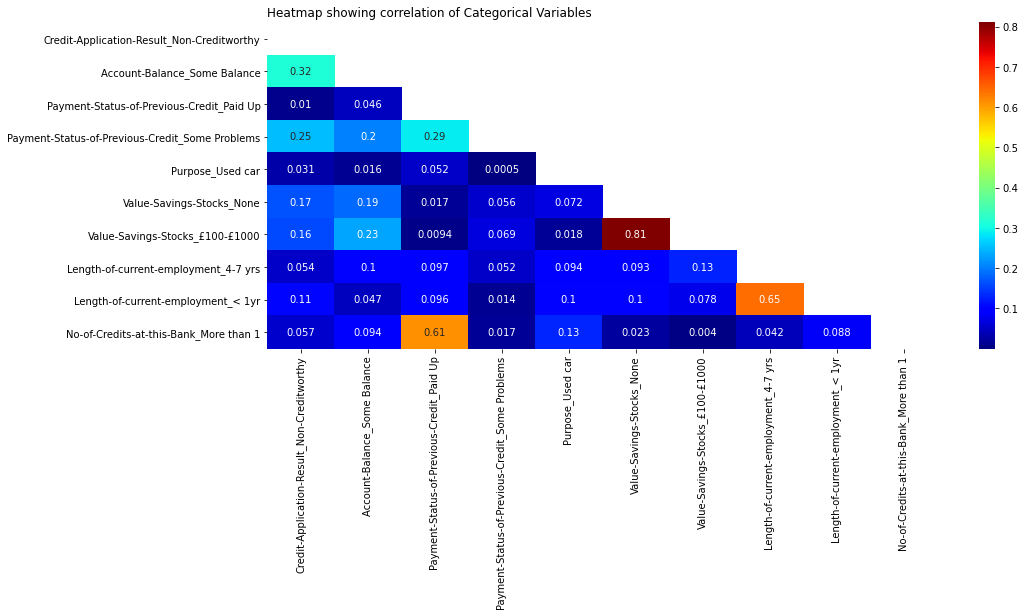

In [31]:
# Heatmap Showing Correlation among categorical variables
corr = training.corr().abs()
matrix = np.triu(corr)
plt.figure(figsize = [15, 6])
sns.heatmap(corr,annot = True, cmap='jet', mask=matrix) #zero discount included
plt.title('Heatmap showing correlation of Categorical Variables',loc='left')

plt.show()

# Modelling

***Preparing data for modelling***

In [32]:
# Combine encoded categorical variables and numerical variables into one dataframe
combo_train=pd.concat([training, numerical], axis=1)
combo_train

,Credit-Application-Result_Non-Creditworthy,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,0,1,1,0,01,0,0,1,0,1,0,4,1494,1,33.0,2
1,0,1,1,0,00,0,0,1,0,1,0,4,1494,1,29.0,2
2,0,1,0,0,00,0,1,0,0,0,1,4,1544,1,42.0,2
3,0,1,0,0,00,0,1,0,0,0,0,4,3380,1,37.0,2
4,0,0,1,0,00,0,1,0,0,1,0,6,343,1,27.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,01,0,0,1,0,1,0,60,7418,1,33.0,2
496,0,0,0,0,00,0,0,1,0,1,0,60,7418,1,27.0,2
497,0,0,0,0,00,0,0,1,0,1,0,60,9157,4,27.0,3
498,0,1,0,0,00,0,0,1,1,0,0,60,13756,4,63.0,3


In [33]:
# Select target variable as 'y' 
y=combo_train['Credit-Application-Result_Non-Creditworthy']
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    1
Name: Credit-Application-Result_Non-Creditworthy, Length: 500, dtype: uint8

In [34]:
# Remove target variable from 'X'
X= combo_train.drop('Credit-Application-Result_Non-Creditworthy', axis=1)
X

,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,1,1,0,01,0,0,1,0,1,0,4,1494,1,33.0,2
1,1,1,0,00,0,0,1,0,1,0,4,1494,1,29.0,2
2,1,0,0,00,0,1,0,0,0,1,4,1544,1,42.0,2
3,1,0,0,00,0,1,0,0,0,0,4,3380,1,37.0,2
4,0,1,0,00,0,1,0,0,1,0,6,343,1,27.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,01,0,0,1,0,1,0,60,7418,1,33.0,2
496,0,0,0,00,0,0,1,0,1,0,60,7418,1,27.0,2
497,0,0,0,00,0,0,1,0,1,0,60,9157,4,27.0,3
498,1,0,0,00,0,0,1,1,0,0,60,13756,4,63.0,3


# Building the Models

In [35]:
# Import packages for ML

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


**SPLITTING THE DATA**

In [36]:
# Split data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
y_test.value_counts()

0    112
1     38
Name: Credit-Application-Result_Non-Creditworthy, dtype: int64

**LINEAR CLASSIFICATION MODELS**
1. Logistic Regression
2. SVC
3. KNN

***LOGISTIC REGRESSION***

In [38]:
logreg= LogisticRegression(solver='lbfgs', max_iter=5000)

# Specify the hyperparameter space
param_grid = {'C':[0.01,0.05,0.5,0.1,1,5,10,50,70,100]}

# Instantiate the GridSearchCV object: cv
grid_logreg = GridSearchCV(logreg, param_grid, cv=5)

#Fit to model
grid_logreg.fit(X_train, y_train)

#Accuracy
print("Tuned Model Parameters: {}".format(grid_logreg.best_params_))
print('Training score: {}'.format(grid_logreg.score(X_train, y_train)))
print('Test score: {}'.format(grid_logreg.score(X_test, y_test)))


logreg_prediction=grid_logreg.predict(X_test)

Tuned Model Parameters: {'C': 5}
Training score: 0.7828571428571428
Test score: 0.7533333333333333


***SUPPORT VECTOR CLASSIFIER***

In [39]:
steps = [("scaler", MinMaxScaler()),("SVM", SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: cv
svc = GridSearchCV(pipeline, parameters,cv=5)

# Fit to the training set
svc.fit(X_train, y_train)

#Accuracy
print("Tuned Model Parameters: {}".format(svc.best_params_))
print('Training score: {}'.format(svc.score(X_train, y_train)))
print('Test score: {}'.format(svc.score(X_test, y_test)))


svc_prediction=svc.predict(X_test)

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}
Training score: 0.8342857142857143
Test score: 0.7866666666666666


***KNearestNeighbors***

In [40]:
knn= KNeighborsClassifier()

# Specify the hyperparameter space
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

# Instantiate the GridSearchCV object: grid_knn
grid_knn = GridSearchCV(knn, param_grid, cv=5)

#Fit to model
grid_knn.fit(X_train, y_train)

#Accuracy
print("Tuned Model Parameters unscaled: {}".format(grid_knn.best_params_))
print('Training score: {}'.format(grid_knn.score(X_train, y_train)))
print('Test score: {}'.format(grid_knn.score(X_test, y_test)))


knn_prediction=grid_knn.predict(X_test)

Tuned Model Parameters unscaled: {'n_neighbors': 10}
Training score: 0.7171428571428572
Test score: 0.7533333333333333


**OTHER ENSEMBLES**

1.Random Forest<br>
2.Decision Tree<br>
3.AdaBoost<br>
4.Gradient Boost

**RANDOM FOREST**

In [41]:
rf = RandomForestClassifier(n_estimators=80 )

# Specify the hyperparameter space
param_grid = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'max_features':[1,2,3,4,5,6,7,8,9,10]}

# Instantiate the GridSearchCV object: grid_knn
grid_rf = GridSearchCV(rf, param_grid, cv=5)

#Fit to model
grid_rf.fit(X_train, y_train)

#Accuracy
print("Tuned Model Parameters: {}".format(grid_rf.best_params_))
print('Training score: {}'.format(grid_rf.score(X_train, y_train)))
print('Test score: {}'.format(grid_rf.score(X_test, y_test)))


rf_prediction=grid_rf.predict(X_test)

Tuned Model Parameters: {'max_features': 3, 'min_samples_leaf': 3}
Training score: 0.8742857142857143
Test score: 0.7733333333333333


**DECISION TREE**

In [42]:
dtr= DecisionTreeClassifier()

#Specify the hyperparameter space
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# Instantiate the GridSearchCV object: grid_dtr
grid_dtr = GridSearchCV(dtr, param_grid, cv=5)

#Fit to model
grid_dtr.fit(X_train,y_train)

#Accuracy
print("Tuned Model Parameters: {}".format(grid_dtr.best_params_))
print('Training score: {}'.format(grid_dtr.score(X_train, y_train)))
print(grid_dtr.score(X_test, y_test))

dtr_prediction=grid_dtr.predict(X_test)

Tuned Model Parameters: {'max_depth': 3}
Training score: 0.8
0.78


**AdaBOOST**

In [43]:
dt = DecisionTreeClassifier(max_depth=3)

# Instantiate an AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC_AUC score: {}'.format(adb_clf_roc_auc_score))
print('Training score: {}'.format(adb_clf.score(X_train, y_train)))
print('Test score: {}'.format(adb_clf.score(X_test, y_test)))

adb_clf_prediction=adb_clf.predict(X_test)

ROC_AUC score: 0.693843984962406
Training score: 1.0
Test score: 0.7666666666666667


**GRADIENT BOOST**

In [44]:
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=3)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print('Training score: {}'.format(gbt.score(X_train, y_train)))
print('Test score: {}'.format(gbt.score(X_test, y_test)))

gbt_prediction=gbt.predict(X_test)

Test set RMSE: 0.48
Training score: 1.0
Test score: 0.7733333333333333


# MODEL SELECTION(BEST PERFORMING MODEL)

Confusion matrix, Classification Report, F1 Score,ROC

**CONFUSION MATRIX**

In [45]:
print("Logistic Regression:")
print(confusion_matrix(y_test, logreg_prediction))
print("\nSVC:")
print(confusion_matrix(y_test, svc_prediction))
print("\nKNN:")
print(confusion_matrix(y_test, knn_prediction))
print("\nRandom Forest:")
print(confusion_matrix(y_test, rf_prediction))
print("\nDecision Tree:")
print(confusion_matrix(y_test, dtr_prediction))
print("\nAda Boost:")
print(confusion_matrix(y_test, adb_clf_prediction))
print("\nGradient Boost:")
print(confusion_matrix(y_test, gbt_prediction))


Logistic Regression:
[[97 15]
 [22 16]]

SVC:
[[105   7]
 [ 25  13]]

KNN:
[[110   2]
 [ 35   3]]

Random Forest:
[[103   9]
 [ 25  13]]

Decision Tree:
[[102  10]
 [ 23  15]]

Ada Boost:
[[101  11]
 [ 24  14]]

Gradient Boost:
[[100  12]
 [ 22  16]]


The models seem to be predicting very well the credit-worthy value but not so well with the not credit-worthy. The best performing ones are Random Forest, Decision Tree, Gradient Boost and SVC.

**CLASSIFICATION REPORT**

In [46]:
print(classification_report(y_test, logreg_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.82      0.87      0.84       112
Not Creditworthy       0.52      0.42      0.46        38

        accuracy                           0.75       150
       macro avg       0.67      0.64      0.65       150
    weighted avg       0.74      0.75      0.74       150



In [47]:
print(classification_report(y_test, svc_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.81      0.94      0.87       112
Not Creditworthy       0.65      0.34      0.45        38

        accuracy                           0.79       150
       macro avg       0.73      0.64      0.66       150
    weighted avg       0.77      0.79      0.76       150



In [48]:
print(classification_report(y_test, knn_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.76      0.98      0.86       112
Not Creditworthy       0.60      0.08      0.14        38

        accuracy                           0.75       150
       macro avg       0.68      0.53      0.50       150
    weighted avg       0.72      0.75      0.67       150



In [49]:
print(classification_report(y_test, rf_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.80      0.92      0.86       112
Not Creditworthy       0.59      0.34      0.43        38

        accuracy                           0.77       150
       macro avg       0.70      0.63      0.65       150
    weighted avg       0.75      0.77      0.75       150



In [50]:
print(classification_report(y_test, dtr_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.82      0.91      0.86       112
Not Creditworthy       0.60      0.39      0.48        38

        accuracy                           0.78       150
       macro avg       0.71      0.65      0.67       150
    weighted avg       0.76      0.78      0.76       150



In [51]:
print(classification_report(y_test, adb_clf_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.81      0.90      0.85       112
Not Creditworthy       0.56      0.37      0.44        38

        accuracy                           0.77       150
       macro avg       0.68      0.64      0.65       150
    weighted avg       0.75      0.77      0.75       150



In [52]:
print(classification_report(y_test, gbt_prediction, target_names=["Creditworthy", "Not Creditworthy"]))

                  precision    recall  f1-score   support

    Creditworthy       0.82      0.89      0.85       112
Not Creditworthy       0.57      0.42      0.48        38

        accuracy                           0.77       150
       macro avg       0.70      0.66      0.67       150
    weighted avg       0.76      0.77      0.76       150



Best performing models from this report are SVC,RF,DTR and GBT. 

**ROC CURVE**

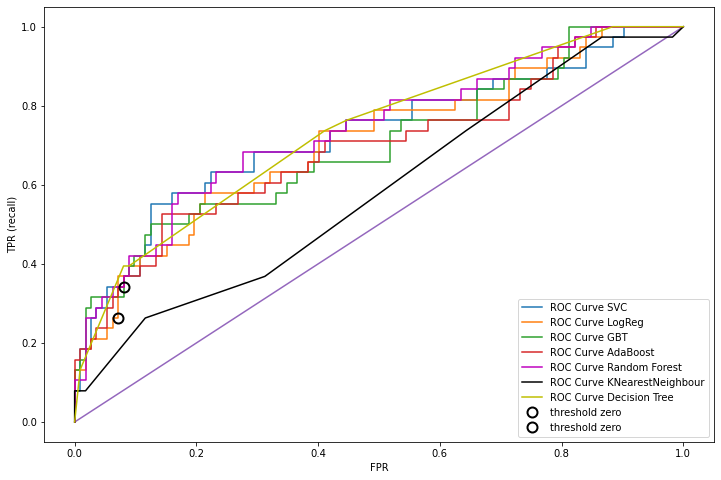

In [53]:
# Decision Function
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_grid_logreg, tpr_grid_logreg, thresholds_logreg = roc_curve(y_test, grid_logreg.decision_function(X_test))
fpr_gbt, tpr_gbt, thresholds_gbt = roc_curve(y_test, gbt.decision_function(X_test))
fpr_adb_clf, tpr_adb_clf, thresholds_adb_clf = roc_curve(y_test, adb_clf.decision_function(X_test))

# Predict probabilty
fpr_rf, tpr_rf, _ = roc_curve(y_test, grid_rf.predict_proba(X_test)[:, 1])#
fpr_knn, tpr_knn, _ = roc_curve(y_test, grid_knn.predict_proba(X_test)[:, 1])
fpr_dtr, tpr_dtr, _ = roc_curve(y_test, grid_dtr.predict_proba(X_test)[:, 1])

# ROC Curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Plot curves
plt.figure(figsize=(12,8))

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_grid_logreg, tpr_grid_logreg, label="ROC Curve LogReg")
plt.plot(fpr_gbt, tpr_gbt, label="ROC Curve GBT")
plt.plot(fpr_adb_clf, tpr_adb_clf, label="ROC Curve AdaBoost")

plt.plot(p_fpr)

plt.plot(fpr_rf, tpr_rf,"m",label="ROC Curve Random Forest")
plt.plot(fpr_knn, tpr_knn,"k",label="ROC Curve KNearestNeighbour")
plt.plot(fpr_dtr, tpr_dtr,"y",label="ROC Curve Decision Tree")

# Find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(fpr_grid_logreg[close_zero], tpr_grid_logreg[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)

# Added styles
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)
plt.show()

From the plot of models, Decision Tree seems to be the best performing model.

#  FINAL SELECTION

***Considering all 3 tests, Decision Tree was the best performing and hence, the preferred model to be used.***

# DEPLOYING MODEL ONTO SCORE DATASET

The selected model is now going to be used to predict new clients who are worthy to be given loans, from new data. 

In [54]:
# Load Excel file into dataframe, new data
datanew=pd.read_excel('customers-to-score.xlsx')

In [55]:
# View shape of dataframe
datanew.shape

(500, 19)

In [56]:
# Display relevant details about dataframe
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account-Balance                    500 non-null    object
 1   Duration-of-Credit-Month           500 non-null    int64 
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Credit-Amount                      500 non-null    int64 
 5   Value-Savings-Stocks               500 non-null    object
 6   Length-of-current-employment       500 non-null    object
 7   Instalment-per-cent                500 non-null    int64 
 8   Guarantors                         500 non-null    object
 9   Duration-in-Current-address        500 non-null    int64 
 10  Most-valuable-available-asset      500 non-null    int64 
 11  Age-years                          500 non-null    int64 
 12  Concurre

In [57]:
# Check for missing values
datanew.isnull().sum()

Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

No missing values

In [58]:
# Preview of dataframe
datanew.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [59]:
# 'Purpose' column in test dataset differs from that in training dataset
display(datanew['Purpose'].value_counts())

Home Related    354
Used car         94
New car          52
Name: Purpose, dtype: int64

In [60]:
# Create new dataframes of categorical and numerical types
numerical_score= datanew.select_dtypes(include='int64')
categorical_score= datanew.select_dtypes(include='object')

In [61]:
# View relevant details about newly created numerical dataframe
numerical_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Duration-of-Credit-Month       500 non-null    int64
 1   Credit-Amount                  500 non-null    int64
 2   Instalment-per-cent            500 non-null    int64
 3   Duration-in-Current-address    500 non-null    int64
 4   Most-valuable-available-asset  500 non-null    int64
 5   Age-years                      500 non-null    int64
 6   Type-of-apartment              500 non-null    int64
 7   Occupation                     500 non-null    int64
 8   No-of-dependents               500 non-null    int64
 9   Telephone                      500 non-null    int64
 10  Foreign-Worker                 500 non-null    int64
dtypes: int64(11)
memory usage: 43.1 KB


In [62]:
# Inspect correlation of numerical variables
numerical_score.corr()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
Duration-of-Credit-Month,1.000000,0.678641,0.058977,0.032430,0.298548,-0.008315,0.166111,NaN,0.008193,0.188856,-0.160696
Credit-Amount,0.678641,1.000000,-0.260431,0.057169,0.294870,0.012289,0.106230,NaN,0.012835,0.268633,-0.091983
Instalment-per-cent,0.058977,-0.260431,1.000000,0.009257,0.025321,0.061361,0.106389,NaN,-0.029699,-0.005706,-0.064583
Duration-in-Current-address,0.032430,0.057169,0.009257,1.000000,0.135093,0.257939,0.033479,NaN,0.008671,0.132624,-0.093657
Most-valuable-available-asset,0.298548,0.294870,0.025321,0.135093,1.000000,0.067494,0.315460,NaN,-0.031201,0.213311,-0.124867
Age-years,-0.008315,0.012289,0.061361,0.257939,0.067494,1.000000,0.277756,NaN,0.111474,0.109781,0.024852
Type-of-apartment,0.166111,0.106230,0.106389,0.033479,0.315460,0.277756,1.000000,NaN,0.052560,0.101843,-0.087728
Occupation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No-of-dependents,0.008193,0.012835,-0.029699,0.008671,-0.031201,0.111474,0.052560,NaN,1.000000,-0.000328,0.100943
Telephone,0.188856,0.268633,-0.005706,0.132624,0.213311,0.109781,0.101843,NaN,-0.000328,1.000000,-0.107907


<AxesSubplot:>

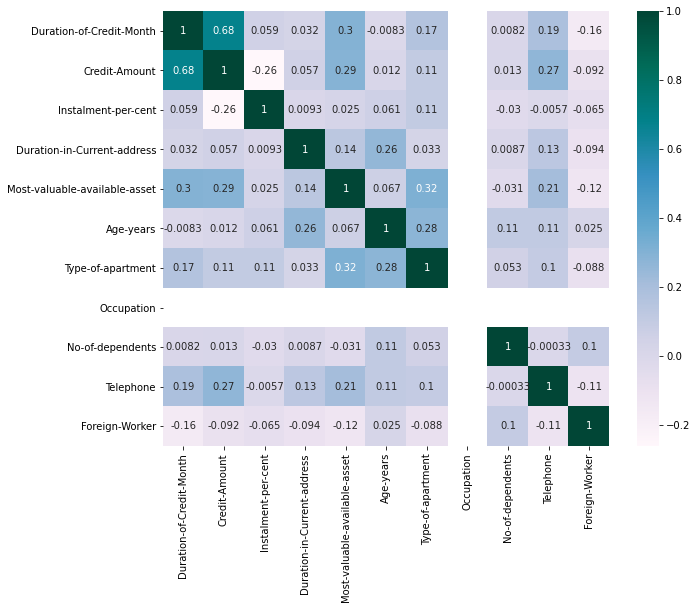

In [63]:
# Visualise correlation of numerical variables 
plt.figure(figsize=(10,8))
sns.heatmap(numerical_score.corr(), annot= True, cmap= 'PuBuGn')

In [64]:
# Drop unwanted columns
numerical_score.drop(columns=['Duration-in-Current-address','Telephone','Foreign-Worker','Occupation','Instalment-per-cent','No-of-dependents'],\
                     axis=1, inplace=True)

C:\Users\kojoa\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
# View resulting numerical dataframe
numerical_score

,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,9,2799,1,36,1
1,12,2122,1,39,1
2,24,3758,4,23,1
3,11,3905,1,36,1
4,6,1957,3,31,2
...,...,...,...,...,...
495,18,3966,1,33,1
496,12,6199,2,28,1
497,24,1987,1,21,1
498,24,2303,1,45,2


In [66]:
# View categorical dataframe
categorical_score

,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
0,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
1,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
2,No Account,Paid Up,Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
3,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
4,No Account,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,1
...,...,...,...,...,...,...,...,...
495,No Account,No Problems (in this bank),Home Related,None,4-7 yrs,None,Other Banks/Depts,More than 1
496,No Account,Some Problems,Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
497,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
498,No Account,Paid Up,Home Related,None,4-7 yrs,Yes,Other Banks/Depts,1


In [67]:
# View respective value categories in individual columns

display(categorical_score['Value-Savings-Stocks'].value_counts())
display(categorical_score['Guarantors'].value_counts())
display(categorical_score['Account-Balance'].value_counts())
display(categorical_score['No-of-Credits-at-this-Bank'].value_counts())
display(categorical_score['Concurrent-Credits'].value_counts())


None          300
£100-£1000    145
< £100         55
Name: Value-Savings-Stocks, dtype: int64

None    451
Yes      49
Name: Guarantors, dtype: int64

No Account      282
Some Balance    218
Name: Account-Balance, dtype: int64

1              313
More than 1    187
Name: No-of-Credits-at-this-Bank, dtype: int64

Other Banks/Depts    500
Name: Concurrent-Credits, dtype: int64

Concurrent-Credits has very low variability, hence, may be dropped.<br>
About 90 percent of customers do not have guarantors, hence, it cannot be considered a major decision=making factor.

In [68]:
# Drop unwanted columns from categorical dataframe
categorical_score.drop(['Concurrent-Credits','Guarantors'], axis=1, inplace= True)

C:\Users\kojoa\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
# Check dataframe after making changes
categorical_score

,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,No-of-Credits-at-this-Bank
0,No Account,No Problems (in this bank),Home Related,None,< 1yr,More than 1
1,No Account,No Problems (in this bank),Home Related,None,< 1yr,More than 1
2,No Account,Paid Up,Home Related,£100-£1000,< 1yr,1
3,No Account,No Problems (in this bank),Home Related,None,< 1yr,More than 1
4,No Account,No Problems (in this bank),Home Related,None,1-4 yrs,1
...,...,...,...,...,...,...
495,No Account,No Problems (in this bank),Home Related,None,4-7 yrs,More than 1
496,No Account,Some Problems,Home Related,None,< 1yr,More than 1
497,No Account,Paid Up,Home Related,None,< 1yr,1
498,No Account,Paid Up,Home Related,None,4-7 yrs,1


In [70]:
# Encode categorical variables
training_score = pd.get_dummies(data= categorical_score, columns= ['Account-Balance',\
                                                                   'Payment-Status-of-Previous-Credit', \
                                                                   'Value-Savings-Stocks','Length-of-current-employment',\
                                                                   'No-of-Credits-at-this-Bank','Purpose'], drop_first= True)

In [71]:
# Check resulting dataframe 
training_score

,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1,Purpose_New car,Purpose_Used car
0,0,0,0,1,0,0,1,1,0,0
1,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,1,1,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,1,0,1,0,1,0,0
496,0,0,1,1,0,0,1,1,0,0
497,0,1,0,1,0,0,1,0,0,0
498,0,1,0,1,0,1,0,0,0,0


In [72]:
# Combine encoded categorical variables and numerical variables
combo_train_score=pd.concat([training_score, numerical_score], axis=1)

In [73]:
# Inspect resulting combination
combo_train_score

,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1,Purpose_New car,Purpose_Used car,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,0,0,0,1,0,0,1,1,0,0,9,2799,1,36,1
1,0,0,0,1,0,0,1,1,0,0,12,2122,1,39,1
2,0,1,0,0,1,0,1,0,0,0,24,3758,4,23,1
3,0,0,0,1,0,0,1,1,0,0,11,3905,1,36,1
4,0,0,0,1,0,0,0,0,0,0,6,1957,3,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,1,0,1,0,1,0,0,18,3966,1,33,1
496,0,0,1,1,0,0,1,1,0,0,12,6199,2,28,1
497,0,1,0,1,0,0,1,0,0,0,24,1987,1,21,1
498,0,1,0,1,0,1,0,0,0,0,24,2303,1,45,2


In [74]:
# View relevant details of combined dataframe
combo_train_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Account-Balance_Some Balance                     500 non-null    uint8
 1   Payment-Status-of-Previous-Credit_Paid Up        500 non-null    uint8
 2   Payment-Status-of-Previous-Credit_Some Problems  500 non-null    uint8
 3   Value-Savings-Stocks_None                        500 non-null    uint8
 4   Value-Savings-Stocks_£100-£1000                  500 non-null    uint8
 5   Length-of-current-employment_4-7 yrs             500 non-null    uint8
 6   Length-of-current-employment_< 1yr               500 non-null    uint8
 7   No-of-Credits-at-this-Bank_More than 1           500 non-null    uint8
 8   Purpose_New car                                  500 non-null    uint8
 9   Purpose_Used car                                 500 n

In [75]:
# Resulting dataframe has no target variable column. Hence it can be assigned as test features dataset
X_test_new= combo_train_score 

In [76]:
# Inspect test set
X_test_new

,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1,Purpose_New car,Purpose_Used car,Duration-of-Credit-Month,Credit-Amount,Most-valuable-available-asset,Age-years,Type-of-apartment
0,0,0,0,1,0,0,1,1,0,0,9,2799,1,36,1
1,0,0,0,1,0,0,1,1,0,0,12,2122,1,39,1
2,0,1,0,0,1,0,1,0,0,0,24,3758,4,23,1
3,0,0,0,1,0,0,1,1,0,0,11,3905,1,36,1
4,0,0,0,1,0,0,0,0,0,0,6,1957,3,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,1,0,1,0,1,0,0,18,3966,1,33,1
496,0,0,1,1,0,0,1,1,0,0,12,6199,2,28,1
497,0,1,0,1,0,0,1,0,0,0,24,1987,1,21,1
498,0,1,0,1,0,1,0,0,0,0,24,2303,1,45,2


In [77]:
# Make prediction
grid_dtr.predict(X_test_new)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
# Store results of prediction as a daframe and view results
y_pred_2=grid_dtr.predict(X_test_new)
Final_predictions_2= pd.DataFrame(y_pred_2)
Final_predictions_2.value_counts()

0    425
1     75
dtype: int64

425 people were predicted as eligible for loans, while 75 were predicted as not credit-worthy.

In [79]:
Final_predictions_2

,0
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,1
497,0
498,0


1 to show that you are not-credit worthy and a 0 to show that you are credit-worthy.

In [81]:
# Final_predictions.value_counts()

# Store results of prediction as a daframe and view results
# y_pred=svc.predict(X_test_new)
# Final_predictions= pd.DataFrame(y_pred)

# y_pred_1=grid_logreg.predict(X_test_new)
# Final_predictions_1= pd.DataFrame(y_pred_1)
# Final_predictions_1.value_counts()

# y_pred_3=gbt.predict(X_test_new)
# Final_predictions_3= pd.DataFrame(y_pred_3)
# Final_predictions_3.value_counts()

# y_pred_4=grid_rf.predict(X_test_new)
# Final_predictions_4= pd.DataFrame(y_pred_4)
# Final_predictions_4.value_counts()